In [ ]:
import pandas as pd

meta = pd.read_excel('meta.xlsx')
reviews = pd.read_excel('reviews.xlsx')


In [ ]:
# prompt: now i wants to implement BERT algorithm with better accuracy  , it will compare two things (abstract + title of meta.xlsx) and (paper_summary + summary_of_strengths + summary_of_weakness) compare this two things to find how much similar the original paper and it's review are you can use "subfolder" column of reviews_output.xlsx to compare it is review of which paper from "Folder Name" columns from meta.xlsx file for each review we have one column confidence in reviews_output.xlsx i wants you to in output display subfolder and rid of reviews_output.xlsx and with it display it's existing confidence score and output of coparision in BERT algorithm

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer


In [ ]:

# Install necessary libraries
!pip install sentence-transformers


In [ ]:

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Function to compare text similarity using BERT
def compare_text(text1, text2):
    embeddings = model.encode([text1, text2])
    similarity_score = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
    return similarity_score


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
results = []
for index, row in reviews.iterrows():
    subfolder = row['subfolder']
    rid = row['rid']
    existing_confidence = row['confidence']

    try:
        paper_match = meta[meta['Folder Name'] == subfolder]
        if not paper_match.empty:
            paper_abstract = paper_match['abstract'].iloc[0]
            paper_title = paper_match['title'].iloc[0]
            text1 = str(paper_abstract) + ' ' + str(paper_title)
            text2 = str(row['paper_summary']) + ' ' + str(row['summary_of_strengths']) + ' ' + str(row['summary_of_weaknesses'])

            bert_score = compare_text(text1, text2)

            # Convert BERT similarity to a 1–5 scale
            if bert_score is not None:
                scaled_score = round(1 + (bert_score * 4), 2)  # keeping 2 decimals, or use int() if you want whole numbers
            else:
                scaled_score = None

            results.append({
                'subfolder': subfolder,
                'rid': rid,
                'existing_confidence': existing_confidence,
                'bert_similarity': bert_score,
                'scaled_similarity_1_to_5': scaled_score
            })
        else:
            print(f"No matching paper found for subfolder: {subfolder}")
            results.append({
                'subfolder': subfolder,
                'rid': rid,
                'existing_confidence': existing_confidence,
                'bert_similarity': None,
                'scaled_similarity_1_to_5': None
            })

    except Exception as e:
        print(f"Error processing row {index}: {e}")
        results.append({
            'subfolder': subfolder,
            'rid': rid,
            'existing_confidence': existing_confidence,
            'bert_similarity': None,
            'scaled_similarity_1_to_5': None
        })

results_df = pd.DataFrame(results)
results_df


,subfolder,rid,existing_confidence,bert_similarity,scaled_similarity_1_to_5
0,37baabcc12717c1fefe6779955e7680c615a878a69d45d...,5c4701c5eabb6f35df25974c92a58e5ae949617a98de91...,4,0.934995,4.74
1,40457e3287163a0a879367375dbd3ed58537a0de494bf3...,a62942bb748a19299a4b0ca74615c6ffb02b6fdaae9fc4...,4,0.825939,4.30
2,ececaa7e6b60520b8b22416cd0ad34ab381fea40c776d7...,ded521e21be436886d381b7dfa702e2266ce7a24d5b57c...,3,0.796048,4.18
3,4be53da06598da6910f11d0c86d5f2180616d1ebdab941...,da580da9a5cedb9f9d5fd02da42ff42e9c95aac36bc7de...,5,0.810426,4.24
4,4be53da06598da6910f11d0c86d5f2180616d1ebdab941...,df84af6bd18973895025734688345e5d694e2b90bc8517...,4,0.736572,3.95
...,...,...,...,...,...
1420,bc6e70bea0ae4b6a0cdc89bf2e2123138e6ed4208ea52d...,fc3cfc095d65f0ce51cd7689181efb7608be4a6806ed82...,4,0.842476,4.37
1421,3e5a5d13187e62125dabfa37eaccff24d432044f8c13bc...,ad727c2a4fef8c8c5efb5b3a4b2998394c14e6abda5e21...,4,0.840021,4.36
1422,12f874be803608fee90c23bffa956408e9b5830f25ed96...,6a6aaa2db774688d9550b190e30e1aa3ce6e02decd5e10...,3,0.770828,4.08
1423,07f5ffd24aaa1fc1d5a86219c2f34f3e5e276d3894dfde...,5d6c46bc13df3960d2eb20699135c2582fa5143169d633...,2,0.720357,3.88


In [ ]:
correlation = results_df['existing_confidence'].corr(results_df['scaled_similarity_1_to_5'])
print(f"Correlation between existing_confidence and scaled_similarity_1_to_5: {correlation}")

Correlation between existing_confidence and scaled_similarity_1_to_5: -0.03758260615335346


In [ ]:
import seaborn as sns


In [ ]:
from scipy.stats import pearsonr, spearmanr

pearson_corr, _ = pearsonr(results_df['existing_confidence'],  results_df['scaled_similarity_1_to_5'])
spearman_corr, _ = spearmanr(results_df['existing_confidence'],  results_df['scaled_similarity_1_to_5'])

print("Pearson Correlation:", pearson_corr)
print("Spearman Correlation:", spearman_corr)


Pearson Correlation: -0.0375826061533535
Spearman Correlation: -0.04118028970415609


In [ ]:

# Add the 'bert_confidence' column to the reviews DataFrame.
reviews['bert_confidence'] = results_df['scaled_similarity_1_to_5']

# Save the updated DataFrame back to the Excel file.
reviews.to_excel('/content/reviews (1).xlsx', index=False)  # index=False prevents writing row indices to the file


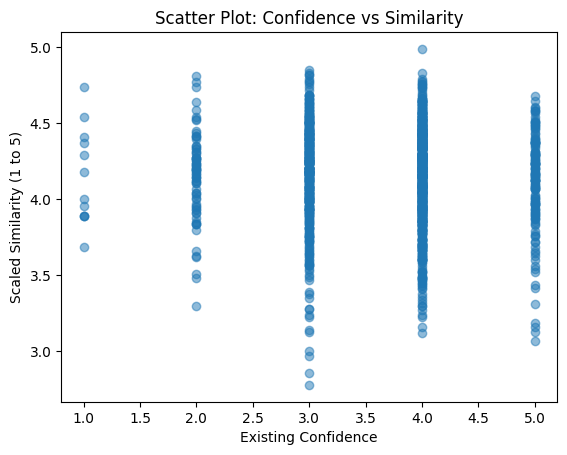

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(results_df['existing_confidence'], results_df['scaled_similarity_1_to_5'], alpha=0.5)
plt.xlabel("Existing Confidence")
plt.ylabel("Scaled Similarity (1 to 5)")
plt.title("Scatter Plot: Confidence vs Similarity")
plt.show()
